#imports & reading in the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
plt.figure(figsize=(12, 8))

diagnosis_df = pd.read_csv("diagnosis.csv")
labs_df = pd.read_csv("labs.csv")
medications_df = pd.read_csv("medications.csv")
operations_df = pd.read_csv("operations.csv")

<Figure size 1200x800 with 0 Axes>

# determining operation types using ICD-10 code

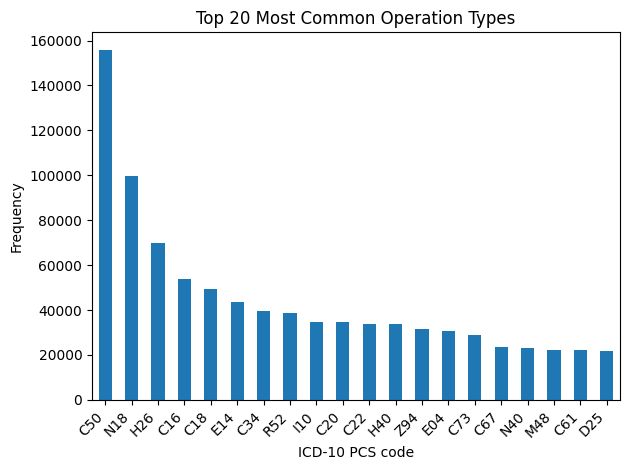

In [ ]:
operation_types = diagnosis_df["icd10_cm"].value_counts()

top_n = 20
top_operation_types = operation_types.head(top_n)

top_operation_types.plot(kind='bar')
plt.title(f'Top {top_n} Most Common Operation Types')
plt.xlabel('ICD-10 PCS code')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#total unique operation types

In [ ]:
unique_operations = diagnosis_df['icd10_cm'].unique()

unique_operations_count = len(unique_operations)
total_operations_count = len(diagnosis_df)

print(f"There are {unique_operations_count} operations with unique ICD-10 codes out of a total of {total_operations_count} operations in the dataset")

There are 1136 operations with unique ICD-10 codes out of a total of 2464620 operations in the dataset


#medications EDA

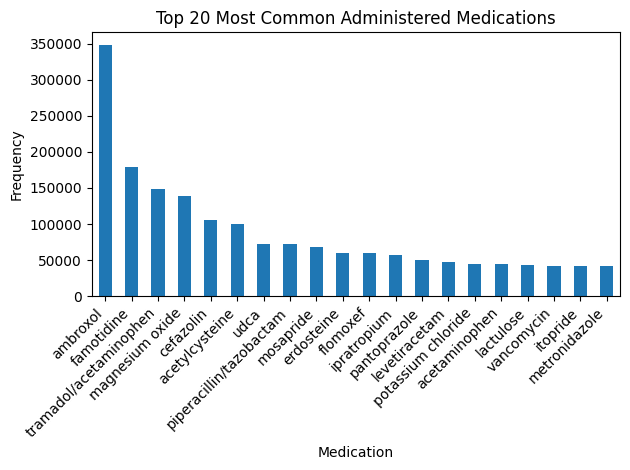

In [ ]:
most_administered_meds = medications_df['drug_name'].value_counts()

top_n = 20
top_meds = most_administered_meds.head(top_n)

top_meds.plot(kind='bar')
plt.title(f'Top {top_n} Most Common Administered Medications')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#total unique medications administered

In [ ]:
unique_medications = medications_df['drug_name'].unique()

unique_medications_count = len(unique_medications)
total_medications_count = len(medications_df)

print(f"There are {unique_medications_count} unique administered medications out of a total of {total_operations_count} operations in the dataset")

There are 1135 unique administered medications out of a total of 2464620 operations in the dataset


#propofol / d33 EDA

In [ ]:
# just d33 patients
d33 = diagnosis_df[diagnosis_df['icd10_cm'] == "D33"]

# Set binary_column to 1 where drug_name = propofol & 0 for any other anytype
medications_df['binary_column'] = 0
medications_df.loc[medications_df['drug_name'] == "propofol", 'binary_column'] = 1

# just propofol patients
propofol = medications_df[medications_df['binary_column'] == 1]
unique_propofol_patients = propofol.drop_duplicates(subset='subject_id')

In [ ]:
# creating a list of unique propofol patient subject_ids
propofol_subject_ids = unique_propofol_patients["subject_id"].tolist()

# checking which unique subject_ids were administered propofol & have d33 diagnosis
matching_subject_ids = d33[d33['subject_id'].isin(propofol_subject_ids)]
unique_matching_subject_ids = matching_subject_ids.drop_duplicates(subset="subject_id")

len(unique_matching_subject_ids)

6